# Simple Non-Linear Regression Model

## Objectives:

1. **Import Necessary Libraries**: 
   - Import libraries required for data manipulation, visualization, and model building.

2. **Generate Non-Linear Regression Data**: 
   - Create a synthetic non-linear regression dataset with added noise.
   - Convert the dataset into a pandas DataFrame and save it as a CSV file.

3. **Visualize the Data**: 
   - Use a scatter plot to visualize the generated non-linear regression data.

4. **Split the Dataset**: 
   - Divide the dataset into training, cross-validation, and testing sets.
   - Visualize the split datasets.

5. **Train Non-Linear Regression Models using Scikit-Learn:** 
   - Implement a function to train non-linear regression models.
   - Train, and evaluate different polynomial regression models, and determine the optimal one.

6. **Compare with Scikit-Learn Model**: 
    - Build, train, visualize, and evaluate a custom polynomial regression model.
    - Compare the performance of the the custom model with the optimal scikit-learn polynomial model.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
x = np.linspace(-3, 3, 100)  # 100 points between -3 and 3
y = np.sin(x) + np.random.normal(scale=0.1, size=x.shape)  # Sinusoidal function with some noise

# Convert the x and y data to pandas dataframe and save the dataframe to a CSV file
df = pd.DataFrame({"x": x, "y": y})
df.to_csv("simple_non_linear_regression_dataset.csv", index=False)

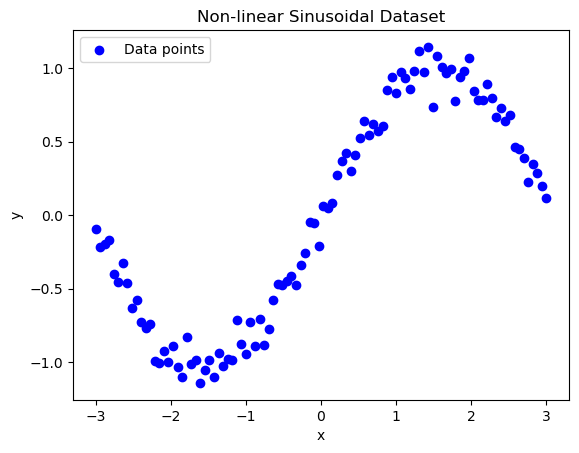

In [3]:
# Plot the dataset
plt.scatter(x, y, color="b", label="Data points")
plt.title("Non-linear Sinusoidal Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

The above plot shows the data with added noise. Real-world data often contains noise due to measurement errors, environmental factors, or other unpredictable influences. Adding noise makes the dataset more realistic and can help create models that generalize better to real-world scenarios.

In [4]:
from sklearn.model_selection import train_test_split

# Split data into training+validation and testing sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42) 

# Print the sizes of each split
print("Training set size:", len(x_train))
print("Cross-validation set size:", len(x_val))
print("Testing set size:", len(x_test))

Training set size: 60
Cross-validation set size: 20
Testing set size: 20


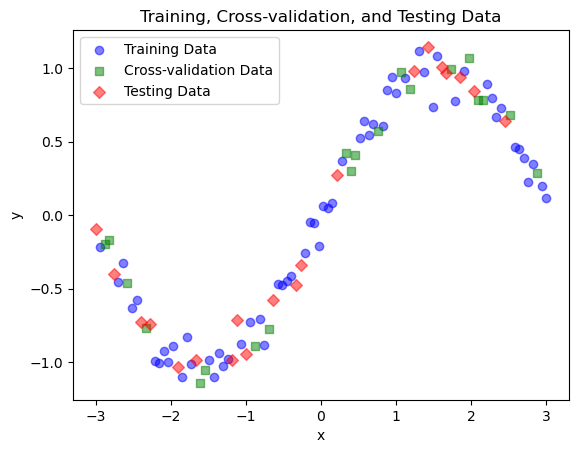

In [5]:
# Plot the training, cross-validation, and testing data sets
plt.scatter(x_train, y_train, c="b", marker="o", label="Training Data", alpha=0.5)
plt.scatter(x_val, y_val, c="g", marker="s", label="Cross-validation Data", alpha=0.5)
plt.scatter(x_test, y_test, c="r", marker="D", label="Testing Data", alpha=0.5)

# Adding title and labels
plt.title("Training, Cross-validation, and Testing Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

We have split our data into three sets: training, cross-validation, and testing. Now we will build different degress of polynomial models using Scikit-Learn library, and compare there results to determine the optimal polynomial regression model for this dataset.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Function to train polynomial regression models
def train_polynomial_models(degrees, x_train, x_val, x_test, y_train, y_val, y_test):
    for degree in degrees:
        # Create a pipeline for polynomial features, standardization, and linear regression
        model = make_pipeline(PolynomialFeatures(degree, include_bias=False),
                              StandardScaler(), LinearRegression())
        model.fit(x_train.reshape(-1, 1), y_train)
        
        # Predict using the model
        y_pred_train = model.predict(x_train.reshape(-1, 1))
        y_pred_val = model.predict(x_val.reshape(-1, 1))
        y_pred_test = model.predict(x_test.reshape(-1, 1))
         
        # Calculate mean squared error
        train_mse = mean_squared_error(y_train, y_pred_train)
        val_mse = mean_squared_error(y_val, y_pred_val)
        test_mse = mean_squared_error(y_test, y_pred_test)

        # Calculate RMSE by taking the square root of MSE
        train_rmse = np.sqrt(train_mse)
        val_rmse = np.sqrt(val_mse)
        test_rmse = np.sqrt(test_mse)

        # Print the calculated errors
        print(f"Degree {degree}:")
        print(f"Training RMSE: {train_rmse}")
        print(f"Validation RMSE: {val_rmse}")
        print(f"Test RMSE: {test_rmse}")
        print("------------------------------")


degrees = [i+2 for i in range(14)]  # List of polynomial degrees to evaluate
train_polynomial_models(degrees, x_train, x_val, x_test, y_train, y_val, y_test)


Degree 2:
Training RMSE: 0.41840146496820896
Validation RMSE: 0.5125357401015654
Test RMSE: 0.49803080933808375
------------------------------
Degree 3:
Training RMSE: 0.10624780696734269
Validation RMSE: 0.10283843849192936
Test RMSE: 0.09884268567731626
------------------------------
Degree 4:
Training RMSE: 0.10491913746497382
Validation RMSE: 0.0986351822080506
Test RMSE: 0.1061768986286452
------------------------------
Degree 5:
Training RMSE: 0.09090827972022808
Validation RMSE: 0.0893662559024951
Test RMSE: 0.07857871079004482
------------------------------
Degree 6:
Training RMSE: 0.09090201858858396
Validation RMSE: 0.08946180908356251
Test RMSE: 0.07829701164211379
------------------------------
Degree 7:
Training RMSE: 0.09089665810332323
Validation RMSE: 0.08954939492046338
Test RMSE: 0.0781387717860152
------------------------------
Degree 8:
Training RMSE: 0.09036608276321324
Validation RMSE: 0.08972761987276387
Test RMSE: 0.07738092504585324
----------------------------

Considering the results and balancing simplicity with performance, the optimal polynomial degree is **5**. It achieves a **training RMSE** of **0.0909**, a **validation RMSE** of **0.0894**, and a **test RMSE** of **0.0786**. This degree provides a good trade-off between performance and model complexity. Polynomial degrees from **6** to **8** offer slightly better performance but with increasing complexity, and as the polynomial degree increases further, the results deteriorate. Degrees lower than **5** show higher RMSE values. Therefore, a polynomial degree of **5** is chosen as it balances effective generalization with a manageable level of complexity. Now we will build our custom polynomial degree **5** model and compare the results with the Scikit-Learn model.

After applying polynomial features to our single feature $\mathbf{x}$, we can represent each feature as a matrix $\mathbf{X}$. This can be represented as a linear regression model as follows:

$$
\begin{equation}
\hat{\mathbf{y}} = f(\mathbf{X}) = \mathbf{X} \cdot \mathbf{w} + b
\end{equation}
$$

where:
- $\hat{\mathbf{y}}$ represents the vector of predicted variables (dependent variables) for all training examples,
- $\mathbf{X}$ represents the matrix of input features (independent variables),
- $\mathbf{w}$ represents the vector of weights (coefficients),
- $b$ represents the $y$-intercept (bias term).

Our goal is to find the optimal values of $\mathbf{w}$ and $b$ for each model that minimize the Root Mean Square Error (RMSE) cost function. The RMSE is defined as:

$$
\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2} \tag{2}
\end{equation}
$$

where:
- $m$ is the number of data points,
- $y_i$ is the actual target value for the $i$-th data point,
- $\hat{y}_i$ is the predicted value for the $i$-th data point.

To update our parameters, we will use the gradient descent optimization algorithm:

$$
\begin{equation}
w_{j, \text{new}} = w_{j, \text{old}} - \alpha \times \frac{\partial \text{RMSE}}{\partial w_j} \tag{3}
\end{equation}
$$

$$
\begin{equation}
b_{\text{new}} = b_{\text{old}} - \alpha \times \frac{\partial \text{RMSE}}{\partial b} \tag{4}
\end{equation}
$$

where:
- $j = 1, 2, 3, \ldots, n$
- $w_{j, \text{new}}$ and $w_{j, \text{old}}$ are the updated and current weights for the $j$-th feature, respectively,
- $b_{\text{new}}$ and $b_{\text{old}}$ are the updated and current $y$-intercepts, respectively,
- $\alpha$ is the learning rate,
- $\frac{\partial \text{RMSE}}{\partial w_j}$ is the gradient of the (RMSE) with respect to the $j$-th weight,
- $\frac{\partial \text{RMSE}}{\partial b}$ is the gradient of the (RMSE) with respect to the $y$-intercept.

and,

$$
\begin{equation}
\frac{\partial \text{RMSE}}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    x^j_i & \text{if } (\hat{y_i} - y_i) \geq 0 \\
    -x^j_i & \text{if } (\hat{y_i} - y_i)  < 0
\end{cases} \tag{5}
\end{equation}
$$

$$
\begin{equation}
\frac{\partial \text{RMSE}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m}
\begin{cases}
    1 & \text{if } (\hat{y_i} - y_i) \geq 0 \\
    -1 & \text{if } (\hat{y_i} - y_i)  < 0
\end{cases} \tag{6}
\end{equation}
$$

In [7]:
def polynomial_features_single(x: np.ndarray, degree: int) -> np.ndarray:
    """
    Generate polynomial features for a single feature.

    Parameters:
    x (np.ndarray): Input data of shape (n_samples,)
    degree (int): The degree of the polynomial features.

    Returns:
    X_poly (np.ndarray): Transformed data matrix with polynomial features.
    
    """

    x = x.reshape(-1, 1)  # Ensure x is a column vector
    n_samples = x.shape[0]

    # Initialize the output matrix
    X_poly = np.ones((n_samples, degree))

    for i in range(degree):
        X_poly[:, i] = x[:, 0] ** (degree - i)

    return X_poly

In [11]:
def train_simple_non_lr_model(x: np.ndarray, y: np.ndarray, degree: int, alpha: float=0.1, iterations: int=1000) \
    -> tuple[np.ndarray, np.ndarray, np.ndarray, float, np.ndarray]:
    """
    Train a simple non-linear regression model using polynomial features.

    Parameters:
    x (np.ndarray): Input feature data of shape (n_samples,)
    y (np.ndarray): Target data of shape (n_samples,)
    degree (int): The degree of the polynomial features.
    alpha (float): Learning rate for gradient descent.
    iterations (int): Number of iterations for gradient descent.

    Returns:
    X_poly (np.ndarray): Polynomial features of the input data.\n
    y_hat (np.ndarray): Predicted values (outputs) for the standardized polynomial features of the input data.\n
    w (np.ndarray): Final weights after training.\n    
    b (float): Final bias after training.\n
    learning_curve_data (np.ndarray): Data for learning curve (iterations vs cost).
    
    """

    # Generate polynomial features
    X_poly = polynomial_features_single(x, degree)
    
    # Standardize the data using z-score standardization for efficient model performance.
    X_poly_scaled = (X_poly - X_poly.mean(axis=0)) / X_poly.std(axis=0)

    # Initialize weights randomly
    w = np.random.randn(degree)
    b = 0.0  # Initialize bias

    # List to store learning curve data
    learning_curve_data = []

    # Gradient descent loop
    for i in range(iterations):
        # Compute model predictions
        y_hat = np.dot(X_poly_scaled, w) + b
        
        # Compute root mean square error (RMSE) cost
        cost = np.sqrt(np.sum((y - y_hat)**2) / len(y))
        print(f"Iteration: {i+1}, cost={cost}")
        
        # Record cost for every 100 iterations
        if ((i+1) % 100) == 0:
            learning_curve_data.append([i+1, cost])

        # Update weights and bias using gradient descent
        if (i+1) != iterations:
            for j in range(len(w)):
                # Update each weight
                dwj = np.sum(np.where((y_hat - y >= 0), X_poly_scaled[:, j], -X_poly_scaled[:, j])) / len(y)
                w[j] = w[j] - alpha * dwj

            # Update bias
            db = np.sum(np.where((y_hat - y >= 0), 1, -1)) / len(y)
            b = b - alpha * db

    return X_poly, y_hat, w, b, np.array(learning_curve_data)

In [15]:
# Train degree 5 polynomial model
X_train, y_hat, w, b, lcd = train_simple_non_lr_model(x_train, y_train, degree=5, alpha=0.05)

Iteration: 1, cost=1.2313980402539615
Iteration: 2, cost=1.169746693650665
Iteration: 3, cost=1.109183530552075
Iteration: 4, cost=1.049783170747904
Iteration: 5, cost=0.9915378656576395
Iteration: 6, cost=0.9353617216426933
Iteration: 7, cost=0.880563612479173
Iteration: 8, cost=0.8283646470944318
Iteration: 9, cost=0.7770272918578985
Iteration: 10, cost=0.7272066440836243
Iteration: 11, cost=0.6782548134091946
Iteration: 12, cost=0.6311728543824476
Iteration: 13, cost=0.5856734931132784
Iteration: 14, cost=0.5421553257060288
Iteration: 15, cost=0.4944875265632036
Iteration: 16, cost=0.4563498433594951
Iteration: 17, cost=0.41624995973553747
Iteration: 18, cost=0.3812643511808266
Iteration: 19, cost=0.3571998517630113
Iteration: 20, cost=0.334035706164407
Iteration: 21, cost=0.3161544176012719
Iteration: 22, cost=0.30519332198402227
Iteration: 23, cost=0.293565044128986
Iteration: 24, cost=0.28574748554417867
Iteration: 25, cost=0.27880287363129996
Iteration: 26, cost=0.27286329349600

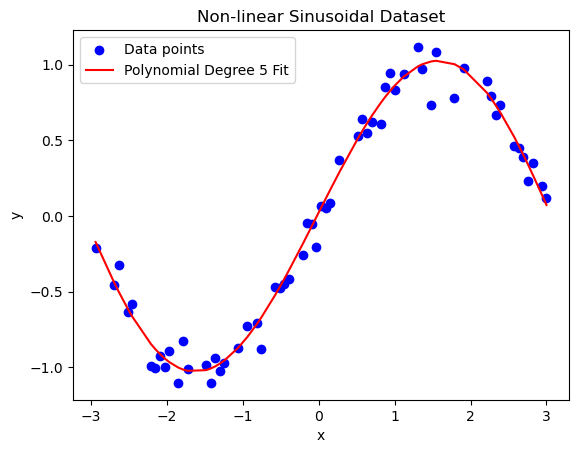

In [16]:
# Sort the data by the x_train data set to ensure the line plot is correctly ordered
sorted_indices = np.argsort(x_train)

# Plot the training dataset and predictions
plt.scatter(x_train, y_train, color="b", label="Data points")
plt.plot(x_train[sorted_indices], y_hat[sorted_indices], color="r", label="Polynomial Degree 5 Fit")
plt.title("Non-linear Sinusoidal Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

Text(0, 0.5, 'Cost')

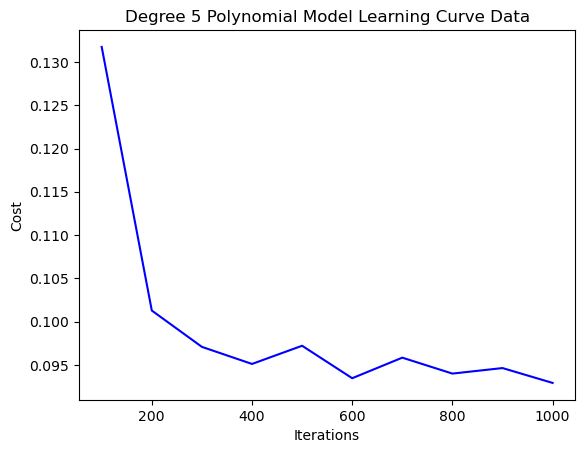

In [17]:
# Plot the learning curve data (Iterations vs cost)
plt.plot(lcd[:, 0], lcd[:, 1], color="b")
plt.title("Degree 5 Polynomial Model Learning Curve Data")
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [18]:
# Transform the validation and test data using polynomial features of degree 5
X_val_poly = polynomial_features_single(x_val, 5)
X_test_poly = polynomial_features_single(x_test, 5)

# Calculate the mean and standard deviation of the training features
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

# Standardize the validation and test features using the training data's statistics
X_val_poly_scaled = (X_val_poly - X_train_mean) / X_train_std
X_test_poly_scaled = (X_test_poly - X_train_mean) / X_train_std 

# Predict values for validation and test sets using the custom model parameters
y_pred_val = np.dot(X_val_poly_scaled, w) + b
y_pred_test = np.dot(X_test_poly_scaled, w) + b

# Calculate the Mean Squared Error (MSE) for training, validation, and test sets
train_mse = mean_squared_error(y_train, y_hat)
val_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred_test)

# Calculate RMSE by taking the square root of MSE
train_rmse = np.sqrt(train_mse)
val_rmse = np.sqrt(val_mse)
test_rmse = np.sqrt(test_mse)

# Print the results of the custom polynomial degree 5 model
print("Results of Custom Degree 5 Polynomial Model:\n")
print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

Results of Custom Degree 5 Polynomial Model:

Train RMSE: 0.09291363271971927
Validation RMSE: 0.09547241759577957
Test RMSE: 0.08014063682405555


Results of Scikit-Learn Degree 5 Polynomial Model:<br>

Training RMSE: 0.09090827972022808<br>
Validation RMSE: 0.0893662559024951<br>
Test RMSE: 0.07857871079004482

Both models demonstrated excellent performance, with our custom-built model showing comparable results to the Scikit-Learn model. This project highlights the effectiveness of polynomial regression in capturing non-linear relationships within data and emphasizes the importance of rigorous model evaluation for ensuring reliability and accuracy. It marks the completion of a thorough and insightful journey into simple non-linear regression modeling.